# *Data import*

In [1]:
from keras.datasets import mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


# *Data exploration*

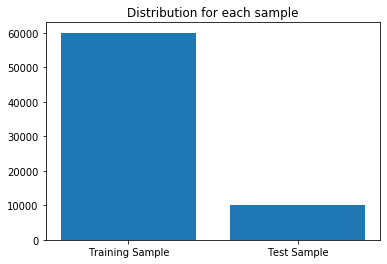

In [2]:
import matplotlib.pyplot as plt

names = ['Training Sample', 'Test Sample']

values = [len(xtrain), len(xtest)]

plt.bar(names, values)

plt.title("Distribution for each sample")

plt.show()


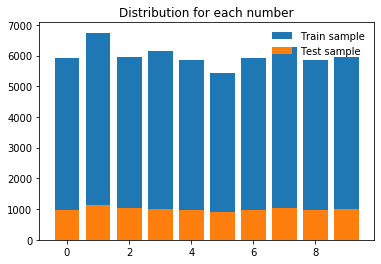

In [3]:
import numpy as np

unique, counts_train = np.unique(ytrain, return_counts=True)
unique, counts_test = np.unique(ytest, return_counts=True)

train = plt.bar(unique, counts_train) # training sample distribution
test = plt.bar(unique, counts_test) # test sample distribution

plt.title("Distribution for each number")

plt.legend([train, test], ['Train sample', 'Test sample'],framealpha = 0)

plt.show()


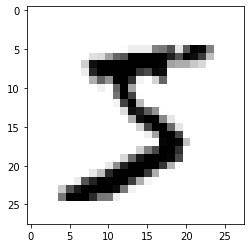

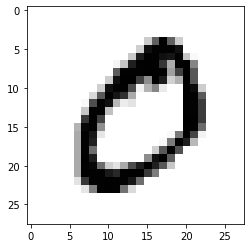

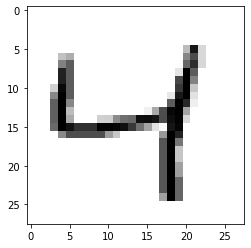

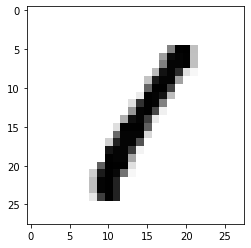

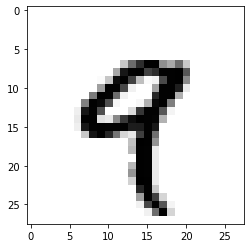

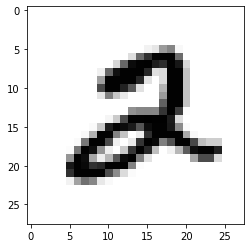

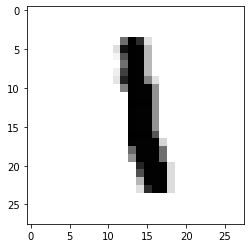

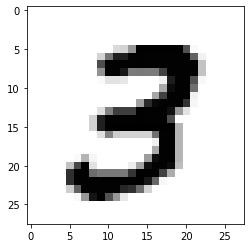

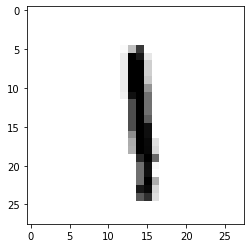

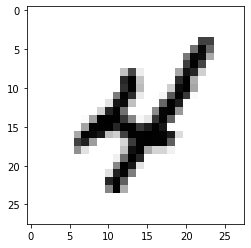

In [4]:
for i in range(0,10) :
  plt.imshow(xtrain[i], cmap = plt.cm.binary)
  plt.show()


# *Preprocessing*

**Normalisation of data**

We divide the value of each pixel (between 0 and 255) by 255 to have a value between 0 and 1 

In [0]:
xtrain = xtrain/255
xtest = xtest/255

**Reshaping of data**

In [6]:
xtrain.shape

(60000, 28, 28)

In [0]:
rows = xtrain[0].shape[0]
cols = xtrain[1].shape[0]

xtrain = xtrain.reshape(xtrain.shape[0], rows, cols, 1 )
xtest = xtest.reshape(xtest.shape[0], rows, cols, 1 )

In [8]:
xtrain.shape

(60000, 28, 28, 1)

**Hot one encoding**

In [0]:
import keras.utils as np_utils

ytrain = np_utils.to_categorical(ytrain)
ytest = np_utils.to_categorical(ytest)

# Convulotional Neural Network 

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               524416    
_________________________________________

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(xtrain, ytrain, epochs=10, 
                    validation_data=(xtest, ytest))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.2051 - acc: 0.9372 - val_loss: 0.0476 - val_acc: 0.9845
Epoch 2/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0854 - acc: 0.9748 - val_loss: 0.0332 - val_acc: 0.9891
Epoch 3/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0668 - acc: 0.9795 - val_loss: 0.0299 - val_acc: 0.9904
Epoch 4/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0544 - acc: 0.9831 - val_loss: 0.0281 - val_acc: 0.9903
Epoch 5/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0473 - acc: 0.9851 - val_loss: 0.0272 - val_acc: 0.9912
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.0422 - acc: 0.9873 - val_loss: 0.0243 - val_acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.0376 - acc: 0.9885 - val_

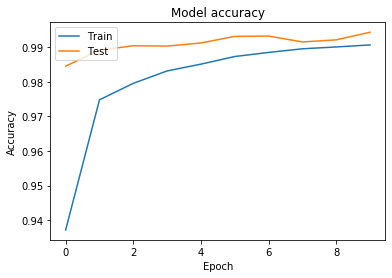

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


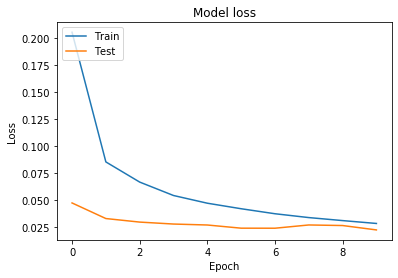

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict_classes(xtest)

print(classification_report(np.argmax(ytest, axis = 1), y_pred))
print(confusion_matrix(np.argmax(ytest, axis = 1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   1    1 1027    0    0    0    0    3    0    0]
 [   0    0    2 1005    0    1    0    1    1    0]
 [   0    0    0    0  979   